# Non-linear regression with a two-layer network

**Objective**
- Build a two-layer network which can learn non-linearity from three different 1d input and output dataset - each of dataset follows cosine, gaussian and polynomial function. 
- Use mean square loss function and manually compute its gradient to find optimal w with iterative gradient descent method from scratch. 

In [5]:
import numpy as np
import math

## 0. Datasets preparation
----------------

Create datasets $X_1$, $X_2$ and $X_3$ . Remember that $\vec x = (1,x)^T$, and the structure of the dataset is a list of tuples: $\{(\vec x^{[n]}, t^{[n]})\}$.

In [6]:
X1 = [(np.array([1,x]), math.cos(3*x)) for x in np.random.uniform(-2,2,50)]
X2 = [(np.array([1,x]), math.exp(-x**2)) for x in np.random.uniform(-2,2,30)]
X3 = [(np.array([1,x]), x**5 + 3*x**4 - 11*x**3 - 27*x**2 + 10*x +64) for x in np.random.uniform(-4.5,3.5,200)]

## 1. Network Implementation

Implement a function that returns the network output for a given input $\vec x$ and parameters $\Theta=(\mathbf W^{(1)}, \vec w^{(2)})$. Remember that the input of the function $\vec x = (1, x)^T$. Also remember to prepend $h_0=1$ in your implementation.  

A two-layer network is defined by three steps:

1. Compute the first layer, i.e., $\vec a = \mathbf W^{(1)} \vec x$.
2. Apply the activation function element-wise: $\vec h = g(\vec a)$
3. Compute the network output: $y = \vec w^{(2)}\,^T\vec h$.




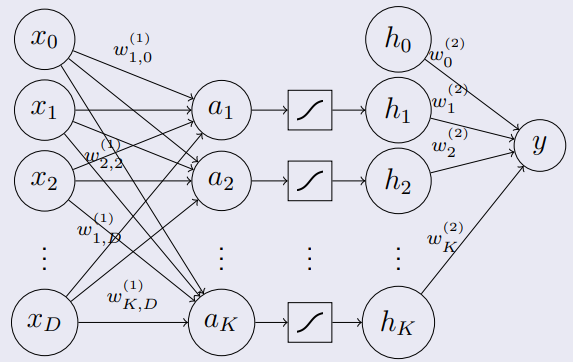

In [ ]:
def network(x, Theta):
  W1, w2 = Theta
  a = np.dot(W1, x)     # x is given as col vector
  h = 1/(1+np.exp(-a))  # sigmoid
  h = np.insert(h,0,1)  # prepend h0 =1 for bias 
  y = np.dot(w2, h)
  return y, h

### Test Network output with Zero and One Weights

Select a specific number of hidden neurons and create the weights with all zeros in the first layer and all ones in the second.

In [ ]:
K = 10
x = np.random.rand(2)
W1= np.zeros((K,2))
w2 = np.ones(K+1)

y, h = network(x,(W1,w2))

# test network output
h_expect = np.append(1,0.5*(np.ones((K,1))))
y_expect = (K*0.5)+1

assert np.all(np.abs(h - h_expect) < 1e-6)
assert np.abs(y - y_expect) < 1e-6

## 2. Compute Gradient
-------------------------------
Compute the gradient for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, which is composed of two parts, one for $\mathbf W^{(1)}$ and one for $\vec w^{(2)}$.

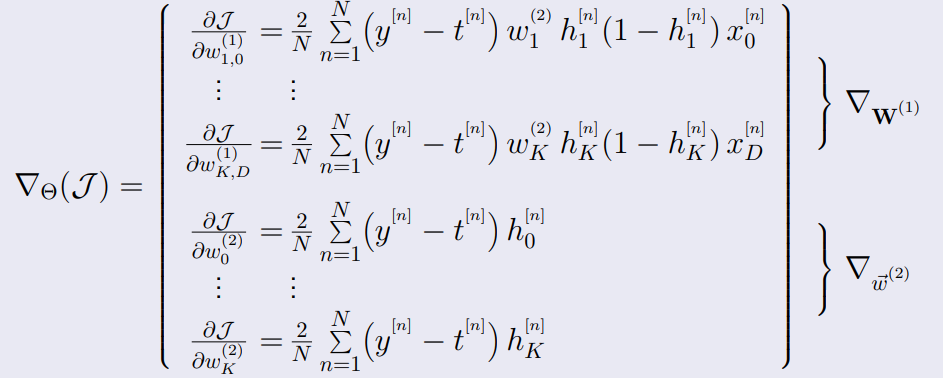

In [7]:
def gradient(X, Theta):
  # split parameters for easier handling
  W1, w2 = Theta
  
  # initialize gradient with respect to both parameters
  dW1 = np.zeros(W1.shape)
  dw2 = np.zeros(w2.shape)

  # iterate over dataset
  for x, t in X:
    # compute the gradient
    y, h = network(x, Theta)
    dW1 += np.outer(((y-t)*w2*h*(1-h))[1:],x)
    dw2 += (y-t)*h
  
  return dW1/len(X), dw2/len(X)

## 3. Gradient Descent

Implement a function that performs iterative gradient descent for a given dataset, given initial parameters and a given learning rate $\eta$.

Gradient descent is implemented with two steps:

1. Compute the gradient of loss
2. Update the parameters according to a given learning rate $\eta$.


In [8]:
def gradient_descent(X, Theta, eta):
  epochs = 10000

  # perform iterative gradient descent
  for epoch in range(epochs):
    # compute the gradient
    dW1, dw2 = gradient(X, Theta)

    # update the parameters
    Theta[0] -= eta*dW1
    Theta[1] -= eta*dw2

  # return optimized parameters
  return Theta

## 4. Non-linear regression 

### Initialize parameters
- Decide proper number of hidden neuron to estimate function of each dataset
- Initialize W1 and w2
- choose proper learning rate

In [9]:
K1 = 10
K2 = 60
K3 = 200

T1 = [np.random.uniform(-1,1,(K1,2)), np.random.uniform(-1,1, K1+1)]
T2 = [np.random.uniform(-1,1,(K2,2)), np.random.uniform(-1,1, K2+1)]
T3 = [np.random.uniform(-1,1,(K3,2)), np.random.uniform(-1,1, K3+1)]

### Find optimized W with gradient descent 

In [10]:
T1_star = gradient_descent(X1, T1, 0.5)
T2_star = gradient_descent(X2, T2, 0.1)
T3_star = gradient_descent(X3, T3, 0.01)


## 5. Plotting Function
-------------------------

Implement a function that plots the output of the network as a line, as well as the training data.

In [18]:
from matplotlib import pyplot
def plot(X, Theta, R):
  # first, plot data samples
  pyplot.plot([x[1] for (x,t) in X],[t for (x,t) in X] , "rx", label="Data")

  # define equidistant points from R[0] to R[1] to evaluate the network
  x = np.arange(R[0], R[1], 0.01)
  # compute the network outputs for these values
  y = [network(np.array((1,v)), Theta)[0] for v in x]
  # plot network approximation
  pyplot.plot(x,y,"k-", label="network")
  pyplot.legend()

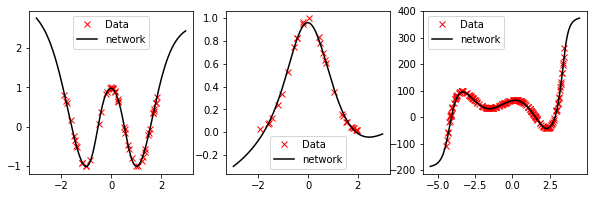

In [19]:
figure = pyplot.figure(figsize=(10,3))

# plot first function
pyplot.subplot(131)
plot(X1, T1_star, [-3,3])

# plot second function
pyplot.subplot(132)
plot(X2, T2_star, [-3,3])

# plot third function
pyplot.subplot(133)
plot(X3, T3_star, [-5.5,4.5])